In [1]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as py


In [2]:
#KEEP THIS
#store file path
csv_data_user0 = 'resources/User0_credit_card_transactions.csv'

#read fileb
credit_card_df_user0 = pd.read_csv(csv_data_user0)

#print head
credit_card_df_user0.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [3]:
#KEEP THIS

#clean up amount column by dropping $ and converting to float
credit_card_df_user0['Amount'] = credit_card_df_user0['Amount'].str.replace('$', '')
credit_card_df_user0['Amount'] = credit_card_df_user0['Amount'].map(float)

#clean up zip by converting to string and then dropping '.0'
credit_card_df_user0['Zip'] = credit_card_df_user0['Zip'].map(str)
credit_card_df_user0['Zip'] = credit_card_df_user0['Zip'].str.replace('\.0', '')

#drop columns I don't need
credit_card_df_user0 = credit_card_df_user0.drop(columns=['User', 'Card', 'Merchant Name', 'Month', 'Day', 'Time', 'Use Chip', 'Errors?', 'Is Fraud?'])

#add in MCC Category column
credit_card_df_user0['MCC Category'] = ''

#recode MCC Category
#df.loc[selection criteria, columns I want] = value
credit_card_df_user0.loc[credit_card_df_user0['MCC']  < 1500, ['MCC Category']] = "Agricultural Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 1500) & (credit_card_df_user0['MCC']<= 2999), ['MCC Category']] = "Contracted Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 3000) & (credit_card_df_user0['MCC']<= 3299), ['MCC Category']] = "Airlines"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 3300) & (credit_card_df_user0['MCC']<= 3499), ['MCC Category']] = "Car Rentals"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 3500) & (credit_card_df_user0['MCC']<= 3999), ['MCC Category']] = "Lodging"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 4000) & (credit_card_df_user0['MCC']<= 4799), ['MCC Category']] = "Transportation Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 4800) & (credit_card_df_user0['MCC']<= 4999), ['MCC Category']] = "Utility Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 5000) & (credit_card_df_user0['MCC']<= 5599), ['MCC Category']] = "Retail Outlet Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 5600) & (credit_card_df_user0['MCC']<= 5699), ['MCC Category']] = "Clothing Stores"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 5700) & (credit_card_df_user0['MCC']<= 7299), ['MCC Category']] = "Misc Stores"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 7300) & (credit_card_df_user0['MCC']<= 7999), ['MCC Category']] = "Business Services"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 8000) & (credit_card_df_user0['MCC']<= 8999), ['MCC Category']] = "Professional Services & Membership Orgs"
credit_card_df_user0.loc[(credit_card_df_user0['MCC']  >= 9000), ['MCC Category']] = "Government Services"

credit_card_df_user0.head()


/var/folders/n3/73dnm89n6_sch505st1wgqc80000gn/T/ipykernel_2322/2225422998.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  credit_card_df_user0['Amount'] = credit_card_df_user0['Amount'].str.replace('$', '')
/var/folders/n3/73dnm89n6_sch505st1wgqc80000gn/T/ipykernel_2322/2225422998.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  credit_card_df_user0['Zip'] = credit_card_df_user0['Zip'].str.replace('\.0', '')


,Year,Amount,Merchant City,Merchant State,Zip,MCC,MCC Category
0,2002,134.09,La Verne,CA,91750,5300,Retail Outlet Services
1,2002,38.48,Monterey Park,CA,91754,5411,Retail Outlet Services
2,2002,120.34,Monterey Park,CA,91754,5411,Retail Outlet Services
3,2002,128.95,Monterey Park,CA,91754,5651,Clothing Stores
4,2002,104.71,La Verne,CA,91750,5912,Misc Stores


In [4]:
#***NEED TO TURN CODE ABOVE INTO FOR LOOP***
#***GETTING ERROR ValueError: The truth value of a Series is ambiguous in Pandas***

#recode MCC into human-readable MCC Category
#for i, rows in credit_card_df.iterrows():
#    mcc_recode = credit_card_df.iloc[i]['MCC Category']
#    if credit_card_df[i]['MCC']  < 1500:
#        credit_card_df['MCC Category'] = "Agricultural Services"

#credit_card_df

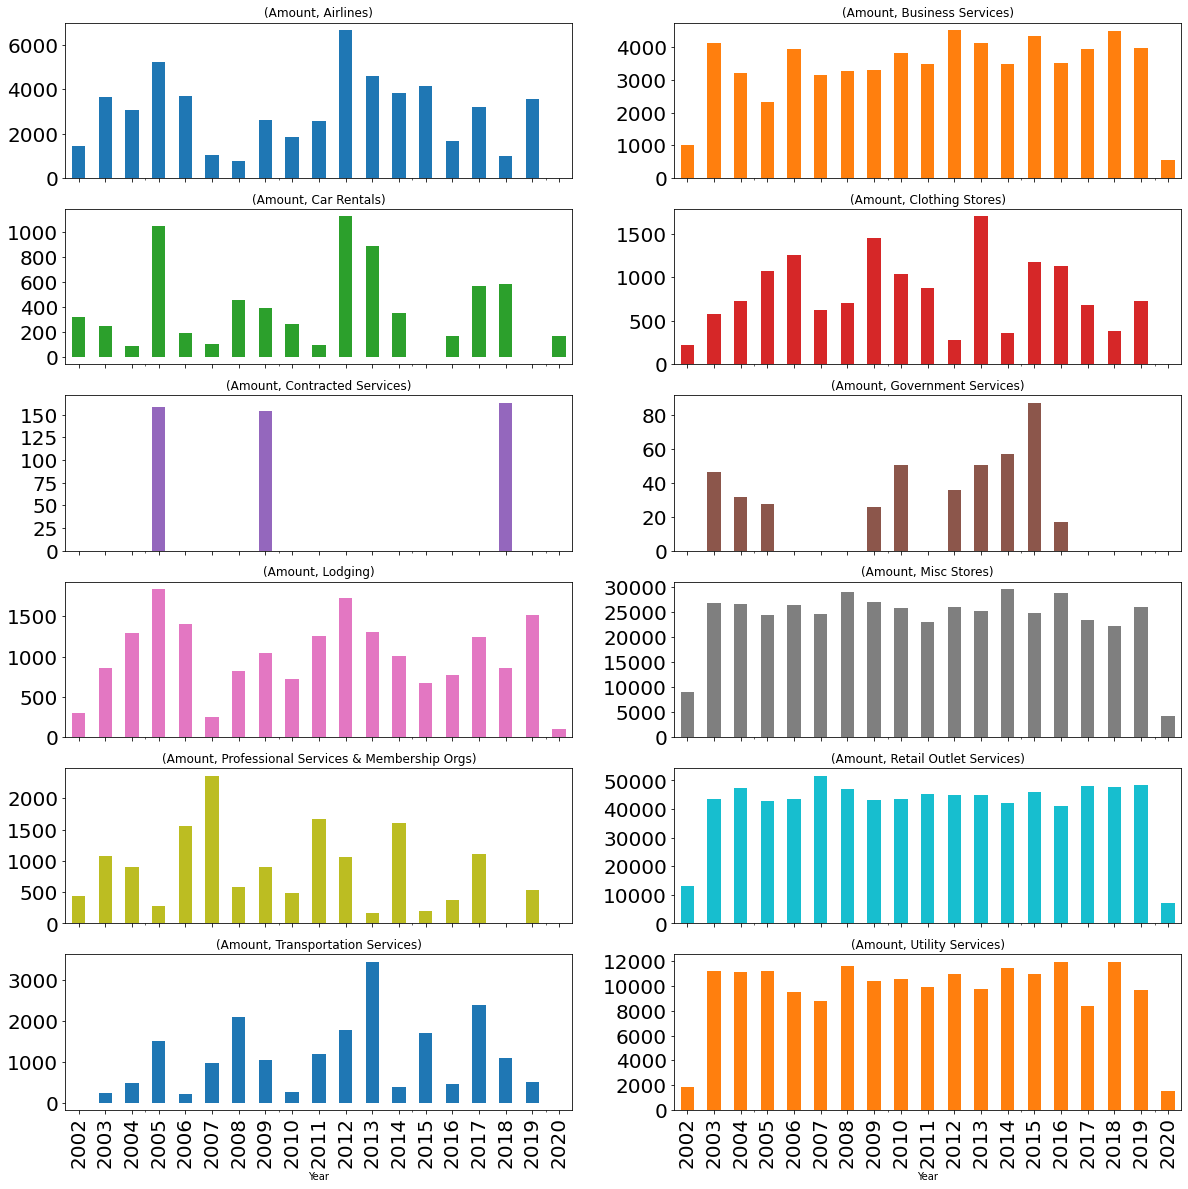

In [5]:
#KEEP THIS

#copy credit card df
grouped_df_user0 = credit_card_df_user0.copy()
#groupby year and MCC Category, sum
grouped_df_user0 = grouped_df_user0.groupby(['Year', 'MCC Category']).sum()
#copy the df
grouped_df_plt_user0 = grouped_df_user0.copy()
#create a pivot table 
grouped_df_plt_user0 = grouped_df_plt_user0.pivot_table(index='Year', columns='MCC Category', values=['Amount'], aggfunc='sum')
#grouped_df_plt
#plot the pivot table as a series of bar charts per MCC Category, x = year
grouped_df_plt_user0.plot(kind='bar', subplots=True, rot=90, figsize=(20, 20), layout=(6, 2), legend=False, fontsize=20)
#save the figure
plt.savefig("output/Fig1_user0.png")


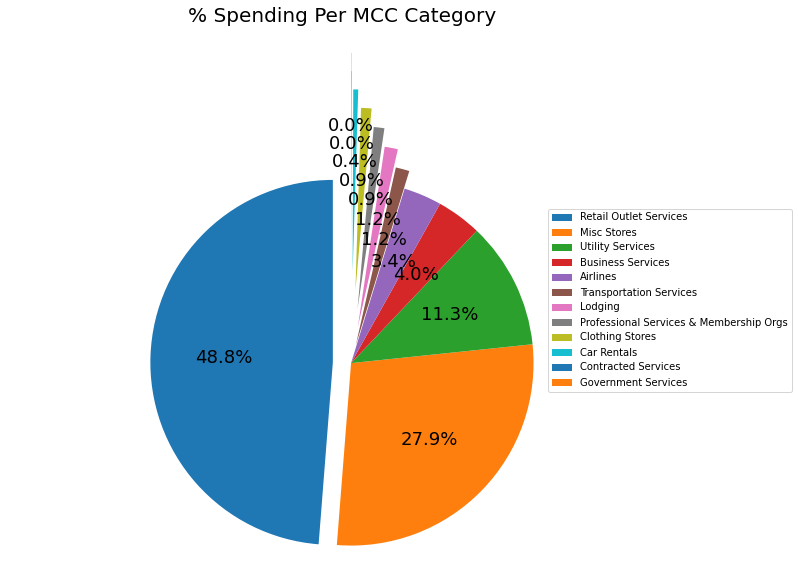

In [6]:
#KEEP THIS

#copy the dataframe
mcc_category_df_user0 = credit_card_df_user0.copy()

#group by MCC Category and get the sum per category
mcc_category_df_user0 = mcc_category_df_user0.groupby(['MCC Category']).sum()

#sort amount spent on category from greatest to least
mcc_category_df_user0 = mcc_category_df_user0.sort_values(by='Amount', ascending = False)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels are the index (MCC Category)
labels = mcc_category_df_user0.index
#amounts are Amount
amounts = mcc_category_df_user0['Amount']
# explode Retail and smaller slices so that the % is legible
explode = (0.1,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7)  
#make the chart larger
fig1, ax1 = plt.subplots(figsize=(12, 10))
#create pie chart; add %s, turn off shadow, rotate 90 degrees, make autpct font larger
ax1.pie(amounts, explode = explode, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'size':18 })
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
#add legend and move to the left
plt.legend(labels, loc="center left", bbox_to_anchor=(.8,.5))
#add a title and make the font size larger
ax1.set_title("% Spending Per MCC Category", size=20)
plt.savefig("output/Fig2_user0.png")
plt.show()

In [7]:
#store file path
csv_data_all = 'resources/credit_card_transactions-ibm_v2.csv'

#read fileb
credit_card_df_all = pd.read_csv(csv_data_all)

#print head
credit_card_df_all.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [8]:
#clean up amount column by dropping $ and converting to float
credit_card_df_all['Amount'] = credit_card_df_all['Amount'].str.replace('$', '')
credit_card_df_all['Amount'] = credit_card_df_all['Amount'].map(float)

#clean up zip by converting to string and then dropping '.0'
credit_card_df_all['Zip'] = credit_card_df_all['Zip'].map(str)
credit_card_df_all['Zip'] = credit_card_df_all['Zip'].str.replace('\.0', '')

#drop columns I don't need
credit_card_df_all = credit_card_df_all.drop(columns=['User', 'Card', 'Merchant Name', 'Month', 'Day', 'Time', 'Use Chip', 'Errors?', 'Is Fraud?'])

#add in MCC Category column
credit_card_df_all['MCC Category'] = ''

#recode MCC Category
#df.loc[selection criteria, columns I want] = value
credit_card_df_all.loc[credit_card_df_all['MCC']  < 1500, ['MCC Category']] = "Agricultural Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 1500) & (credit_card_df_all['MCC']<= 2999), ['MCC Category']] = "Contracted Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 3000) & (credit_card_df_all['MCC']<= 3299), ['MCC Category']] = "Airlines"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 3300) & (credit_card_df_all['MCC']<= 3499), ['MCC Category']] = "Car Rentals"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 3500) & (credit_card_df_all['MCC']<= 3999), ['MCC Category']] = "Lodging"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 4000) & (credit_card_df_all['MCC']<= 4799), ['MCC Category']] = "Transportation Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 4800) & (credit_card_df_all['MCC']<= 4999), ['MCC Category']] = "Utility Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 5000) & (credit_card_df_all['MCC']<= 5599), ['MCC Category']] = "Retail Outlet Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 5600) & (credit_card_df_all['MCC']<= 5699), ['MCC Category']] = "Clothing Stores"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 5700) & (credit_card_df_all['MCC']<= 7299), ['MCC Category']] = "Misc Stores"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 7300) & (credit_card_df_all['MCC']<= 7999), ['MCC Category']] = "Business Services"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 8000) & (credit_card_df_all['MCC']<= 8999), ['MCC Category']] = "Professional Services & Membership Orgs"
credit_card_df_all.loc[(credit_card_df_all['MCC']  >= 9000), ['MCC Category']] = "Government Services"

credit_card_df_all.head()


/var/folders/n3/73dnm89n6_sch505st1wgqc80000gn/T/ipykernel_2322/3317654979.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  credit_card_df_all['Amount'] = credit_card_df_all['Amount'].str.replace('$', '')
/var/folders/n3/73dnm89n6_sch505st1wgqc80000gn/T/ipykernel_2322/3317654979.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  credit_card_df_all['Zip'] = credit_card_df_all['Zip'].str.replace('\.0', '')


,Year,Amount,Merchant City,Merchant State,Zip,MCC,MCC Category
0,2002,134.09,La Verne,CA,91750,5300,Retail Outlet Services
1,2002,38.48,Monterey Park,CA,91754,5411,Retail Outlet Services
2,2002,120.34,Monterey Park,CA,91754,5411,Retail Outlet Services
3,2002,128.95,Monterey Park,CA,91754,5651,Clothing Stores
4,2002,104.71,La Verne,CA,91750,5912,Misc Stores


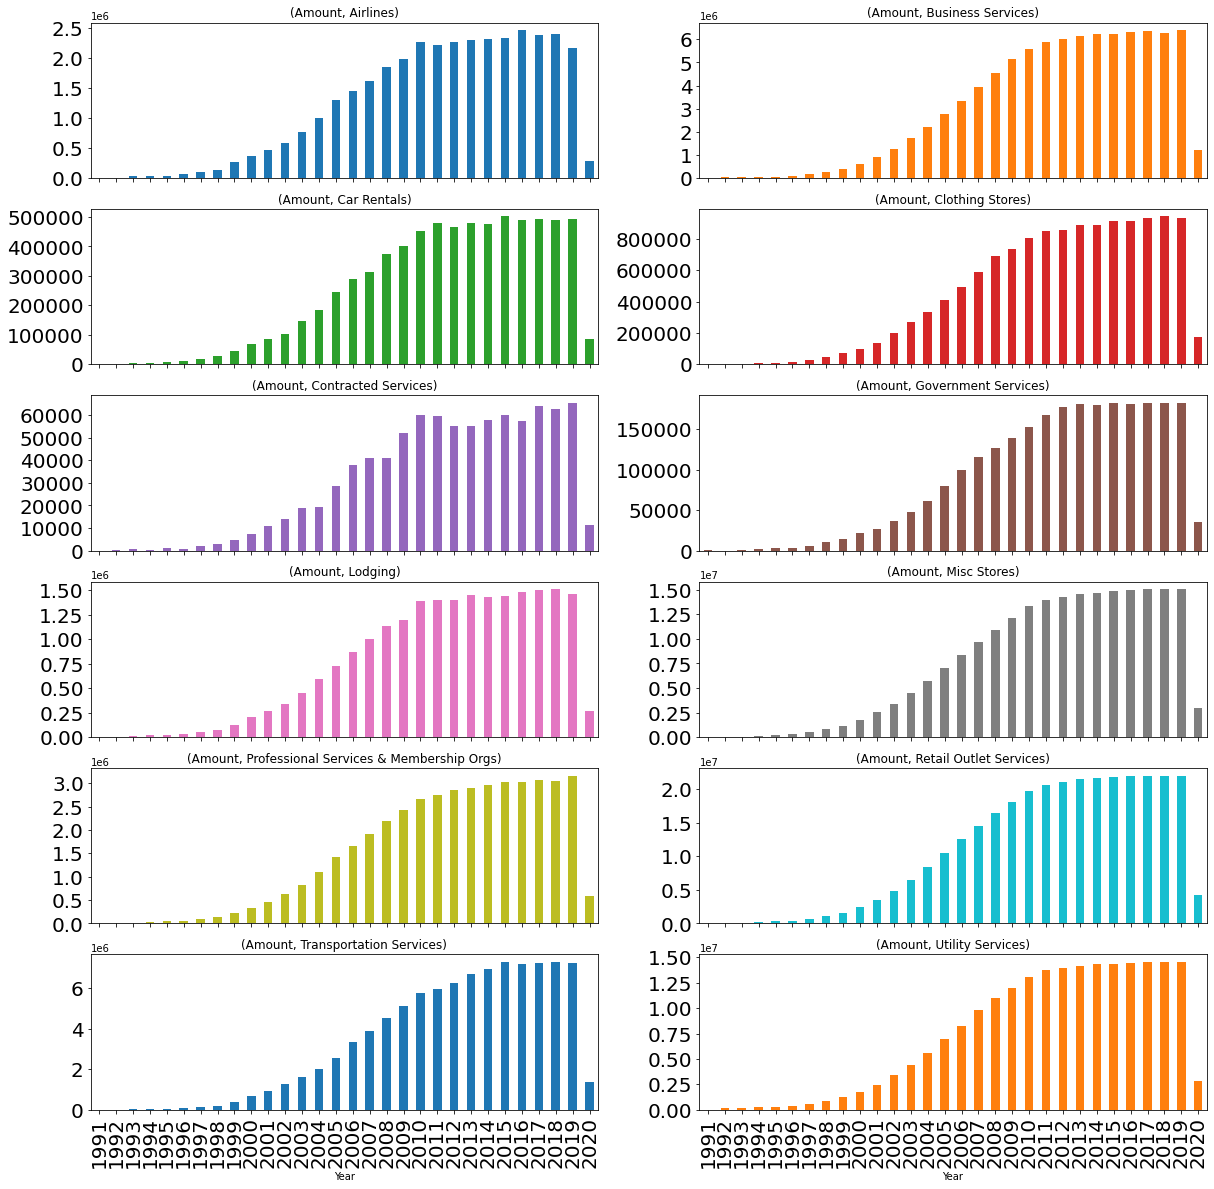

In [9]:
#KEEP THIS
grouped_df_all = credit_card_df_all.copy()
grouped_df_all = grouped_df_all.groupby(['Year', 'MCC Category']).sum()

#copy the df
grouped_df_plt_all = grouped_df_all.copy()
#create a pivot table 
grouped_df_plt_all = grouped_df_plt_all.pivot_table(index='Year', columns='MCC Category', values=['Amount'], aggfunc='sum')
#plot the pivot table as a series of bar charts per MCC Category, x = year
grouped_df_plt_all.plot(kind='bar', subplots=True, rot=90, figsize=(20, 20), layout=(6, 2), legend=False, fontsize=20)
#save the figure
plt.savefig("output/Fig1_all.png")

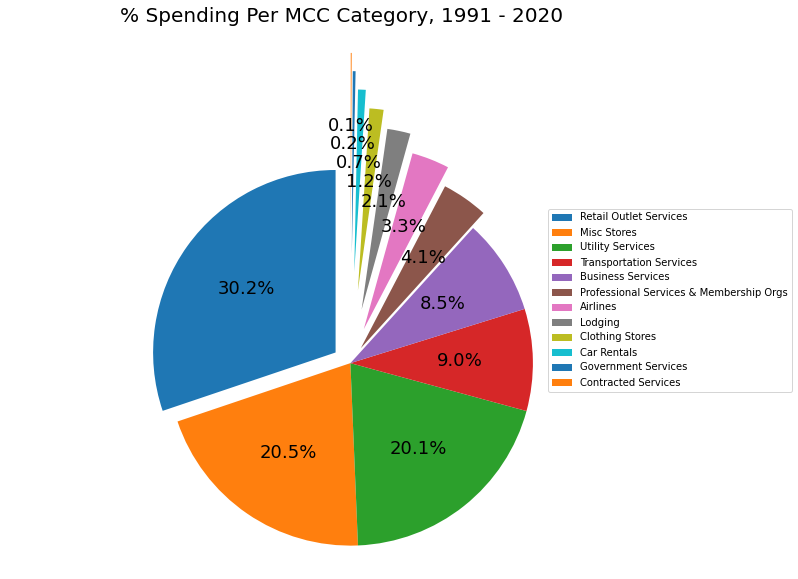

In [10]:
#KEEP THIS

#copy the dataframe
mcc_category_df_all = credit_card_df_all.copy()

#group by MCC Category and get the sum per category
mcc_category_df_all = mcc_category_df_all.groupby(['MCC Category']).sum()

#sort amount spent on category from greatest to least
mcc_category_df_all = mcc_category_df_all.sort_values(by='Amount', ascending = False)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels are the index (MCC Category)
labels = mcc_category_df_all.index
#amounts are Amount
amounts = mcc_category_df_all['Amount']
# explode Retail and smaller slices so that the % is legible
explode = (0.1,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7)  
#make the chart larger
fig1, ax1 = plt.subplots(figsize=(12, 10))
#create pie chart; add %s, turn off shadow, rotate 90 degrees, make autpct font larger
ax1.pie(amounts, explode = explode, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'size':18 })
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
#add legend and move to the left
plt.legend(labels, loc="center left", bbox_to_anchor=(.8,.5))
#add a title and make the font size larger
ax1.set_title("% Spending Per MCC Category, 1991 - 2020", size=20)
plt.savefig("output/Fig2_all.png")
plt.show()

In [11]:
all_retail = credit_card_df_all.copy()
all_retail = all_retail.loc[(all_retail['Year'] >=2002) & (all_retail['MCC Category'] == 'Retail Outlet Services')]
all_retail = all_retail.groupby(['Year']).mean()
all_retail

,Amount,MCC
Year,,
2002,29.930724,5434.191994
2003,30.319015,5434.226543
2004,30.274321,5433.941441
2005,30.272127,5433.004821
2006,30.082928,5433.073906
2007,29.690126,5432.569657
2008,29.178562,5432.446415
2009,28.937875,5432.232940
2010,28.887075,5431.539670


In [12]:
user0_retail = credit_card_df_user0.copy()
user0_retail = user0_retail.loc[(user0_retail['Year'] >=2002) & (user0_retail['MCC Category'] == 'Retail Outlet Services')]
user0_retail = user0_retail.groupby(['Year']).mean()
user0_retail

,Amount,MCC
Year,,
2002,79.830000,5408.102410
2003,86.316186,5396.363636
2004,76.008491,5405.630819
2005,76.667939,5402.826165
2006,77.755062,5399.663102
2007,84.955698,5397.738916
2008,79.444068,5394.667797
2009,77.075027,5404.016100
2010,81.246853,5392.484171


In [13]:
merged_df_retail = pd.merge(all_retail, user0_retail, on='Year')
merged_df_retail = merged_df_retail.drop(columns=['MCC_x', 'MCC_y'])
merged_df_retail = merged_df_retail.rename(columns={"Amount_x": "Avg Spend - All Users", "Amount_y": "Avg Spend - User 0"})
merged_df_retail


,Avg Spend - All Users,Avg Spend - User 0
Year,,
2002,29.930724,79.830000
2003,30.319015,86.316186
2004,30.274321,76.008491
2005,30.272127,76.667939
2006,30.082928,77.755062
2007,29.690126,84.955698
2008,29.178562,79.444068
2009,28.937875,77.075027
2010,28.887075,81.246853


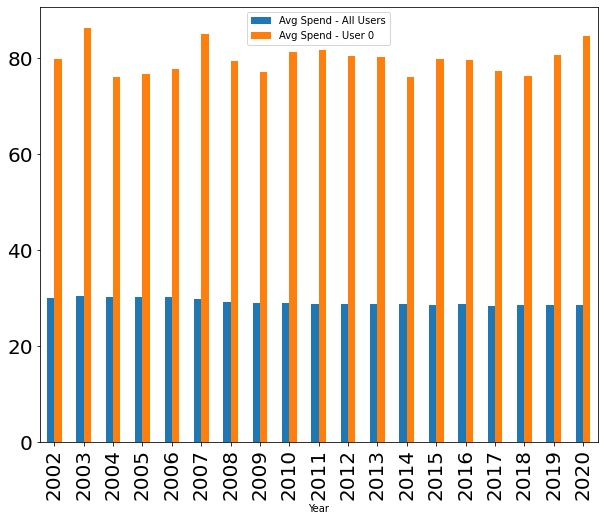

In [14]:
merged_df_retail.plot(kind='bar', subplots=False, rot=90, figsize=(10, 8), legend=True, fontsize=20)
#save the figure
plt.savefig("output/retail_comparison.png")